In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Simple Linear Regression

In [6]:
dataset = pd.read_csv('/Users/prathap-4878/Downloads/student_scores.csv', index_col=False)

In [7]:
dataset.shape

(25, 2)

In [8]:
dataset.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## 1. Data Visualization
To visualize distribution of data

Regression line is drawn over the points

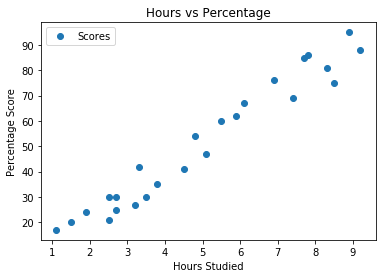

In [12]:
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()  

## 2. Preparing the Data

In [13]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## 3. Training the Algorithm

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
print(regressor.intercept_)  

2.0181600414346903


In [17]:
print(regressor.coef_)

[9.91065648]


## 4. Making Predictions

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## 5. Evaluating error


### Root Mean Squared Error (RMSE) 
is the square root of the mean of the squared errors:

In [21]:
from sklearn import metrics  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Root Mean Squared Error: 4.647447612100362


# Multiple Linear Regression

In [22]:
#    For one year, the consumption of petrol was measured in 48 states.
#    The relevant variables are the petrol tax, the per capita
#    income, the number of miles of paved highway, and
#    the proportion of the population with driver's licenses.
#
#    There are 48 rows of data.  The data include:
#
#      I,  the index;
#      A0, 1;
#      A1, the petrol tax;
#      A2, the per capita income;
#      A3, the number of miles of paved highway;
#      A4, the proportion of drivers;
#      B,  the consumption of petrol.
#
#    We seek a model of the form
#
#      B = A0 * X0 + A1 * X1 + A2 * X2 + A3 * X3 + A4 * X4.

In [26]:
dataset = pd.read_csv('/Users/prathap-4878/Downloads/petrol_consumption.csv')

In [27]:
dataset.head()

,Index,One,Petrol_tax,Average_income,Paved_Highways,PP_driver_licenses,Consumption_of_petrol
0,1,1,9.0,3571,1976,0.525,541
1,2,1,9.0,4092,1250,0.572,524
2,3,1,9.0,3865,1586,0.580,561
3,4,1,7.5,4870,2351,0.529,414
4,5,1,8.0,4399,431,0.544,410


In [28]:
dataset.describe()

,Index,One,Petrol_tax,Average_income,Paved_Highways,PP_driver_licenses,Consumption_of_petrol
count,48.00,48.0,48.000000,48.000000,48.000000,48.000000,48.000000
mean,24.50,1.0,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,14.00,0.0,0.950770,573.623768,3491.507166,0.055470,111.885816
min,1.00,1.0,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,12.75,1.0,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,24.50,1.0,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,36.25,1.0,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,48.00,1.0,10.000000,5342.000000,17782.000000,0.724000,968.000000


## 1. Data Visualization
To visualize distribution of data

Regression line is drawn over the points

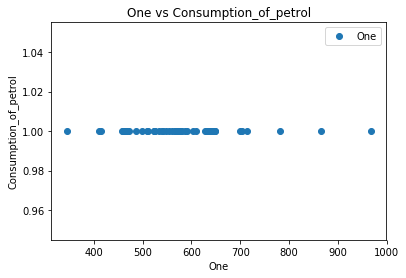

In [34]:
dataset.plot(x='Consumption_of_petrol', y='One', style='o')  
plt.title('One vs Consumption_of_petrol')  
plt.xlabel('One')  
plt.ylabel('Consumption_of_petrol')  
plt.show() 

## 2. Preparing the Data

In [31]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',  
       'PP_driver_licenses']]
y = dataset['Consumption_of_petrol']  

In [32]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

## 3. Training the Algorithm

In [33]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df 

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
PP_driver_licenses,1341.862121


## 4. Making Predictions

In [37]:
y_pred = regressor.predict(X_test)  

In [38]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


## 5. Evaluating the Algorithm

In [39]:
from sklearn import metrics  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Root Mean Squared Error: 68.31064915215168
